In [4]:
# 
import nltk
#nltk.download()

In [5]:
# Load in the essential packages
import pandas as pd
import numpy as np
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter
import emoji

In [6]:
# read in our dataset:
df = pd.read_csv('reddit_wsb.csv')
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [7]:
df.dtypes

title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
timestamp     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      53187 non-null  object 
 1   score      53187 non-null  int64  
 2   id         53187 non-null  object 
 3   url        53187 non-null  object 
 4   comms_num  53187 non-null  int64  
 5   created    53187 non-null  float64
 6   body       24738 non-null  object 
 7   timestamp  53187 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [9]:
df['Date'] =pd.to_datetime(df['timestamp']).dt.date
df.head()

,title,score,id,url,comms_num,created,body,timestamp,Date
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,2021-01-28
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,2021-01-28
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,2021-01-28
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,2021-01-28


In [10]:
df.dtypes

title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
timestamp     object
Date          object
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
print(df['Date'].max())
print(df['Date'].min())
            

2021-08-16 00:00:00
2020-09-29 00:00:00


In [13]:
#max and min date
print(df['Date'].min())
print(df['Date'].max())

2020-09-29 00:00:00
2021-08-16 00:00:00


In [14]:
# create 
df['Month_Year']=df['Date'].dt.strftime('%Y-%m')
df.head()

,title,score,id,url,comms_num,created,body,timestamp,Date,Month_Year
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41,2021-01-28,2021-01
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10,2021-01-28,2021-01
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28,2021-01
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57,2021-01-28,2021-01
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56,2021-01-28,2021-01


# Explore the Data

In [15]:
df.groupby(['Month_Year'])['title'].count()

Month_Year
2020-09        1
2021-01    19254
2021-02    17438
2021-03     7283
2021-04     1991
2021-05     2259
2021-06     2750
2021-07     1360
2021-08      851
Name: title, dtype: int64

In [16]:
#conditional for 2021
year21 = df['Date']>'12/31/2020'
df2 =df[year21]

<AxesSubplot:xlabel='Date'>

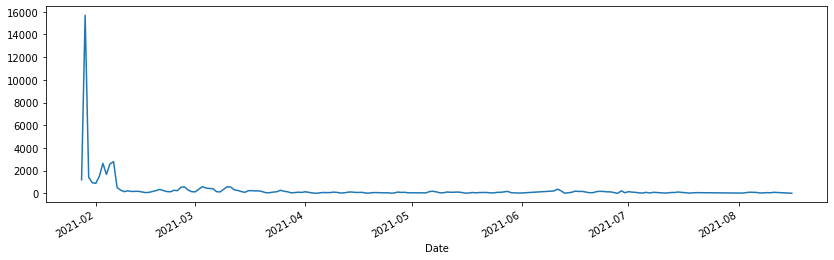

In [17]:
# Visualize the trend
df2.groupby(['Date'])['title'].count().plot(figsize=(14,4))

# Cleaning Data 

In [18]:
# creating a bag of words
comments =  " ".join(df2['title'])
comments

'It\'s not about the money, it\'s about sending a message. 🚀💎🙌 Math Professor Scott Steiner says the numbers spell DISASTER for Gamestop shorts Exit the system NEW SEC FILING FOR GME! CAN SOMEONE LESS RETARDED THAN ME PLEASE INTERPRET? Not to distract from GME, just thought our AMC brothers should be aware of this WE BREAKING THROUGH SHORT STOCK DOESN\'T HAVE AN EXPIRATION DATE THIS IS THE MOMENT Currently Holding AMC and NOK - Is it retarded that I think I should move it all to GME today? I have nothing to say but BRUH I am speechless TO THE MOON 🚀🚀🚀💎💎👋👋 We need to keep this movement going, we all can make history! GME Premarket 🍁 Musk approved 🎮🛑💎✋ Once you\'re done with GME - $AG and $SLV, the gentleman\'s short squeeze, driven by macro fundamentals $GME price has nothing to do with fundamentals and everything to do with financial economics I Love You Retards!!!! 420 wasn’t a meme. GME 🚀 🚀 🚀 To The Mass Relays & Beyond I come back to you now... At the turn of the tide. 9 words broug

In [19]:
# create tokens
words = word_tokenize(comments)
words

['It',
 "'s",
 'not',
 'about',
 'the',
 'money',
 ',',
 'it',
 "'s",
 'about',
 'sending',
 'a',
 'message',
 '.',
 '🚀💎🙌',
 'Math',
 'Professor',
 'Scott',
 'Steiner',
 'says',
 'the',
 'numbers',
 'spell',
 'DISASTER',
 'for',
 'Gamestop',
 'shorts',
 'Exit',
 'the',
 'system',
 'NEW',
 'SEC',
 'FILING',
 'FOR',
 'GME',
 '!',
 'CAN',
 'SOMEONE',
 'LESS',
 'RETARDED',
 'THAN',
 'ME',
 'PLEASE',
 'INTERPRET',
 '?',
 'Not',
 'to',
 'distract',
 'from',
 'GME',
 ',',
 'just',
 'thought',
 'our',
 'AMC',
 'brothers',
 'should',
 'be',
 'aware',
 'of',
 'this',
 'WE',
 'BREAKING',
 'THROUGH',
 'SHORT',
 'STOCK',
 'DOES',
 "N'T",
 'HAVE',
 'AN',
 'EXPIRATION',
 'DATE',
 'THIS',
 'IS',
 'THE',
 'MOMENT',
 'Currently',
 'Holding',
 'AMC',
 'and',
 'NOK',
 '-',
 'Is',
 'it',
 'retarded',
 'that',
 'I',
 'think',
 'I',
 'should',
 'move',
 'it',
 'all',
 'to',
 'GME',
 'today',
 '?',
 'I',
 'have',
 'nothing',
 'to',
 'say',
 'but',
 'BRUH',
 'I',
 'am',
 'speechless',
 'TO',
 'THE',
 'MOON',
 

In [20]:
# create a data cleaning function to remove stopwords, puctuation and lemmatize 
bad_words = ['fuck','shit','retard','bitch']
def clean_text(new_tokens):
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t not in bad_words]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    return new_tokens
    
    
    


In [21]:
clean_words =clean_text(words)

In [22]:
clean_words

['money',
 'sending',
 'message',
 'math',
 'professor',
 'scott',
 'steiner',
 'say',
 'number',
 'spell',
 'disaster',
 'gamestop',
 'short',
 'exit',
 'system',
 'new',
 'sec',
 'filing',
 'gme',
 'someone',
 'le',
 'retarded',
 'please',
 'interpret',
 'distract',
 'gme',
 'thought',
 'amc',
 'brother',
 'aware',
 'breaking',
 'short',
 'stock',
 'expiration',
 'date',
 'moment',
 'currently',
 'holding',
 'amc',
 'nok',
 'retarded',
 'think',
 'move',
 'gme',
 'today',
 'nothing',
 'say',
 'bruh',
 'speechless',
 'moon',
 'need',
 'keep',
 'movement',
 'going',
 'make',
 'history',
 'gme',
 'premarket',
 'musk',
 'approved',
 'done',
 'gme',
 'ag',
 'slv',
 'gentleman',
 'short',
 'squeeze',
 'driven',
 'macro',
 'fundamental',
 'gme',
 'price',
 'nothing',
 'fundamental',
 'everything',
 'financial',
 'economics',
 'love',
 'retard',
 'meme',
 'gme',
 'mass',
 'relay',
 'beyond',
 'come',
 'back',
 'turn',
 'tide',
 'word',
 'brought',
 'fucker',
 'sec',
 'daily',
 'discussion',


In [23]:
from collections import Counter

In [24]:
word_count = Counter(clean_words)
word_count

Counter({'money': 1082,
         'sending': 27,
         'message': 126,
         'math': 35,
         'professor': 7,
         'scott': 8,
         'steiner': 1,
         'say': 511,
         'number': 174,
         'spell': 8,
         'disaster': 10,
         'gamestop': 856,
         'short': 1894,
         'exit': 43,
         'system': 76,
         'new': 890,
         'sec': 400,
         'filing': 44,
         'gme': 8738,
         'someone': 298,
         'le': 118,
         'retarded': 291,
         'please': 526,
         'interpret': 2,
         'distract': 8,
         'thought': 355,
         'amc': 3492,
         'brother': 206,
         'aware': 19,
         'breaking': 75,
         'stock': 3107,
         'expiration': 36,
         'date': 89,
         'moment': 100,
         'currently': 104,
         'holding': 2178,
         'nok': 1111,
         'think': 694,
         'move': 413,
         'today': 1481,
         'nothing': 200,
         'bruh': 15,
         'speech

In [25]:
count = Counter(ngrams(clean_words,3))
pd.DataFrame(count.items(),columns=['ngram','count'])

,ngram,count
0,"(money, sending, message)",3
1,"(sending, message, math)",1
2,"(message, math, professor)",1
3,"(math, professor, scott)",1
4,"(professor, scott, steiner)",1
...,...,...
290692,"(amd, hitler, reacts)",1
290693,"(hitler, reacts, market)",1
290694,"(reacts, market, irrational)",1
290695,"(market, irrational, daily)",1


# Super Function

In [26]:
# create a data cleaning function to remove stopwords, puctuation and lemmatize 
bad_words = ['fuck','shit','retard','bitch']
def big_clean_text(sentence):
    sentence =  " ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t not in bad_words]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    counted = Counter(new_tokens)
    counted_2 =Counter(ngrams(new_tokens,2))
    counted_3 =Counter(ngrams(new_tokens,3))
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency'])
    bi_gram_freq = pd.DataFrame(counted_2.items(),columns=['bi-gram','frequency'])
    tri_gram_freq = pd.DataFrame(counted_3.items(),columns=['tri-gram','frequency'])
    return word_freq,bi_gram_freq,tri_gram_freq

In [27]:
data1, data2, data3 =big_clean_text(df2['title'])

In [28]:
data3

,tri-gram,frequency
0,"(money, sending, message)",3
1,"(sending, message, math)",1
2,"(message, math, professor)",1
3,"(math, professor, scott)",1
4,"(professor, scott, steiner)",1
...,...,...
290692,"(amd, hitler, reacts)",1
290693,"(hitler, reacts, market)",1
290694,"(reacts, market, irrational)",1
290695,"(market, irrational, daily)",1


In [43]:
#create emoji function 
def get_emojis(sentence):
    sentence = " ".join(sentence)
    words = word_tokenize(sentence)
    emojis = [e for e in words if e in emoji.UNICODE_EMOJI['en']]
    return emojis
    
  


    

In [46]:
emojis_bow = get_emojis(df['title'])
emoji_data = pd.DataFrame(Counter(emojis_bow).items(),columns=['emoji','count'])
emoji_data

,emoji,count
0,🍁,2
1,🚀,1558
2,😤,17
3,🌝,75
4,😂,51
...,...,...
418,🐭,1
419,♣️,1
420,🇨🇳,2
421,🏦,1


In [50]:
#create emoji function 
def get_emojis_data(sentence):
    sentence = " ".join(sentence)
    words = word_tokenize(sentence)
    emojis = [e for e in words if e in emoji.UNICODE_EMOJI['en']]
    emoji_data = pd.DataFrame(Counter(emojis).items(),columns=['emoji','count'])
    return emoji_data

In [51]:
emoji_table =  get_emojis_data(df['title'])
emoji_table

,emoji,count
0,🍁,2
1,🚀,1558
2,😤,17
3,🌝,75
4,😂,51
...,...,...
418,🐭,1
419,♣️,1
420,🇨🇳,2
421,🏦,1
